<a href="https://colab.research.google.com/github/WittmannF/machine-learning-web-app/blob/master/2-preprocessamento/2_a_DA_e_Preprocessamento_Braistorming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Pegar base de dados
!wget https://raw.githubusercontent.com/WittmannF/machine-learning-web-app/master/dados_calculadora_imoveis.csv

--2020-03-13 11:54:18--  https://raw.githubusercontent.com/WittmannF/machine-learning-web-app/master/dados_calculadora_imoveis.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25228 (25K) [text/plain]
Saving to: ‘dados_calculadora_imoveis.csv’

dados_calculadora_i 100%[===================>]  24.64K  --.-KB/s    in 0.01s   

2020-03-13 11:54:19 (2.01 MB/s) - ‘dados_calculadora_imoveis.csv’ saved [25228/25228]



In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [0]:
ls

dados_calculadora_imoveis.csv  sample_data/


In [0]:
df = pd.read_csv('dados_calculadora_imoveis.csv')

In [0]:
df.head()

,zona,quartos,area,preco
0,norte,2.0,90.0,1100.0
1,norte,1.0,50.0,700.0
2,norte,1.0,70.0,600.0
3,norte,2.0,90.0,1200.0
4,norte,1.0,40.0,750.0


In [0]:
X_train, X_test, y_train, y_test = train_test_split(df[['zona','quartos','area']], 
                                                    df['preco'], 
                                                    stratify=df['zona'], 
                                                    test_size=0.25,
                                                    random_state=0
                                                    )

In [0]:
X_train['zona'].value_counts()

oeste    216
leste    216
norte    216
sul      216
Name: zona, dtype: int64

In [0]:
X_test['zona'].value_counts()

norte    72
sul      72
oeste    72
leste    72
Name: zona, dtype: int64

In [0]:
treino = pd.concat([X_train, y_train], axis=1)
teste = pd.concat([X_test, y_test], axis=1)

treino.to_csv('treino.csv', index=False)
teste.to_csv('teste.csv', index=False)

In [0]:
del treino, teste, X_train, X_test, y_train, y_test, df
df = pd.read_csv('treino.csv')

In [0]:
df.describe(include='all')

,zona,quartos,area,preco
count,864,804.000000,864.000000,8.640000e+02
unique,4,NaN,NaN,NaN
top,oeste,NaN,NaN,NaN
freq,216,NaN,NaN,NaN
mean,NaN,2.598259,176.914352,8.524549e+03
std,NaN,1.562017,160.104802,6.585445e+04
min,NaN,1.000000,1.000000,3.000000e+02
25%,NaN,2.000000,60.000000,1.200000e+03
50%,NaN,2.000000,125.000000,2.500000e+03
75%,NaN,3.000000,234.000000,5.500000e+03


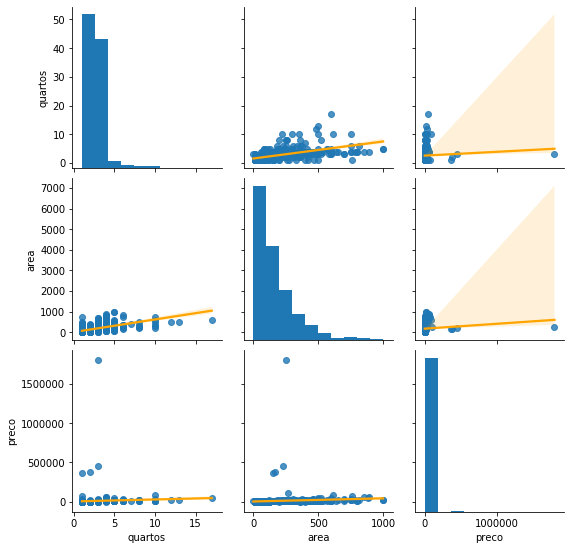

In [0]:
sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color':'orange'}})

In [0]:
# Limpeza dos dados
LIMITE_PRECO = 100000 # Valor maximo de aluguel
LIMITE_AREA = 2500

In [0]:
df_limpo = df[df['preco']<=LIMITE_PRECO][df['area']<=LIMITE_AREA]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


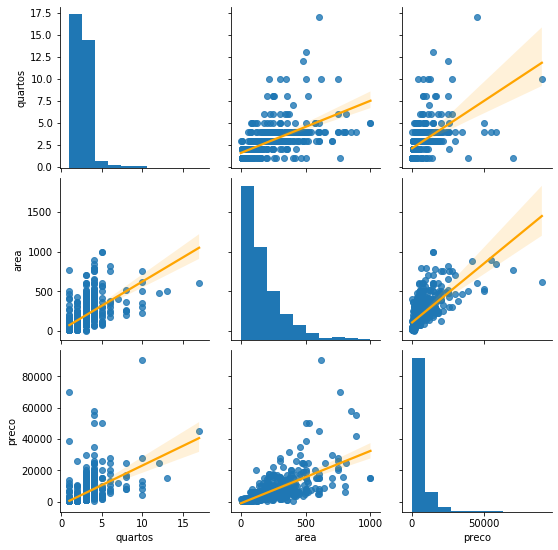

In [0]:
sns.pairplot(df_limpo, kind='reg', plot_kws={'line_kws':{'color':'orange'}})

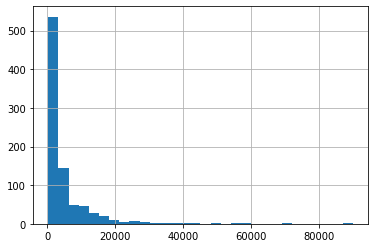

In [0]:
df_limpo['preco'].hist(bins=30)

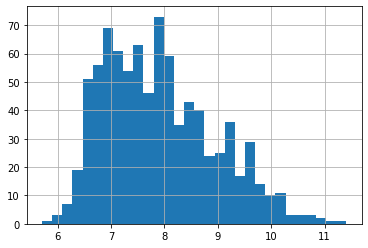

In [0]:
df_limpo['preco'].apply(np.log1p).hist(bins=30)

In [0]:
# Aplicando transformacao logaritmica
df_limpo['preco'] = df_limpo['preco'].apply(np.log1p)
#df_limpo['quartos'] = df_limpo['quartos'].apply(np.log1p)
df_limpo['area'] = df_limpo['area'].apply(np.log1p)

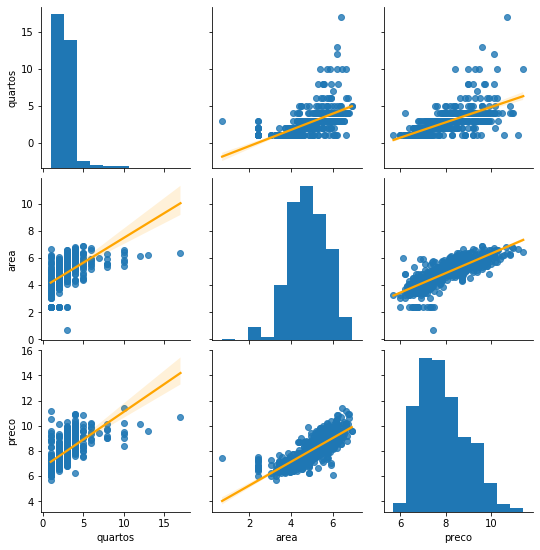

In [0]:
sns.pairplot(df_limpo, kind='reg', plot_kws={'line_kws':{'color':'orange'}})

In [0]:
# Preencher dados ausentes dos quartos
df_limpo['quartos'].median()

2.0

In [0]:
#df_limpo.loc[df_limpo['quartos'].isna(),'quartos'] = df_limpo['quartos'].median()

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [0]:
#reg = LinearRegression()
reg = RandomForestRegressor()

In [0]:
df_limpo[~df_limpo['quartos'].isna()]

,zona,quartos,area,preco
0,norte,3.0,5.707110,7.378384
1,sul,3.0,5.017280,8.294300
2,norte,4.0,5.993961,8.699681
3,leste,2.0,4.025352,6.857514
4,sul,4.0,6.206576,8.517393
...,...,...,...,...
857,sul,2.0,4.394449,8.039480
860,sul,6.0,5.442418,8.612685
861,leste,3.0,4.795791,8.006701
862,leste,3.0,4.510860,7.170888


In [0]:
X_fillna = df_limpo.loc[~df_limpo['quartos'].isna(),'area']

In [0]:
y_fillna = df_limpo.loc[~df_limpo['quartos'].isna(),'quartos']

In [0]:
reg.fit(X_fillna.values.reshape(-1, 1), y_fillna.values.reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
reg.predict([[np.log1p(40)]]).astype(int)

array([1])

In [0]:
X_fillna_pred = df_limpo.loc[df_limpo['quartos'].isna(),'area'].values.reshape(-1, 1)

In [0]:
y_fillna_pred = reg.predict(X_fillna_pred).astype(int); y_fillna_pred

array([2, 3, 3, 2, 2, 3, 2, 4, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2,
       2, 2, 1, 4, 4, 3, 4, 4, 2, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 2, 5, 2,
       5, 2, 3, 4, 3, 2, 2, 2, 2, 1, 4, 3, 3, 3, 3])

In [0]:
df_limpo.loc[df_limpo['quartos'].isna(),'quartos'] = y_fillna_pred

In [0]:
df_limpo.head()

,zona,quartos,area,preco
0,norte,3.0,5.707110,7.378384
1,sul,3.0,5.017280,8.294300
2,norte,4.0,5.993961,8.699681
3,leste,2.0,4.025352,6.857514
4,sul,4.0,6.206576,8.517393


In [0]:
df_limpo.describe()

,quartos,area,preco
count,859.000000,859.000000,859.000000
mean,2.608847,4.807831,7.902039
std,1.526217,0.901770,1.031470
min,1.000000,0.693147,5.707110
25%,2.000000,4.110874,7.090910
50%,2.000000,4.795791,7.783641
75%,3.000000,5.446728,8.612685
max,17.000000,6.908755,11.407576


In [0]:
df_limpo['quartos'] = df_limpo['quartos'].apply(np.log1p)

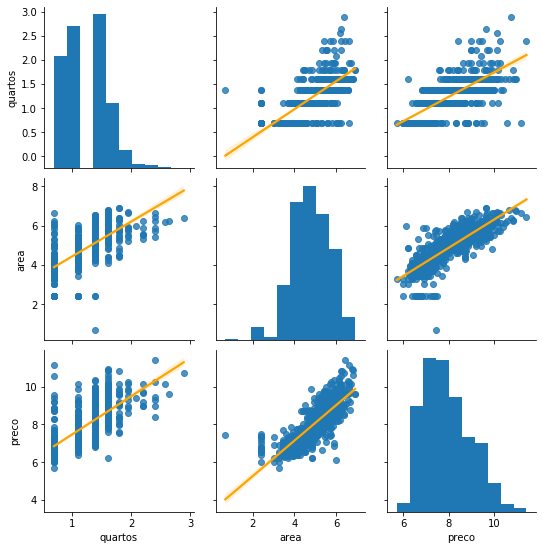

In [0]:
sns.pairplot(df_limpo, kind='reg', plot_kws={'line_kws':{'color':'orange'}})

In [0]:
zona_one_hot = pd.get_dummies(df_limpo['zona'])

In [0]:
treino_preprocessado = pd.concat([zona_one_hot, df_limpo[['quartos','area','preco']]], axis=1)

In [0]:
treino_preprocessado.to_csv('treino_preprocessado.csv', index=False)

In [0]:
ls

dados_calculadora_imoveis.csv  teste.csv   treino_preprocessado.csv
sample_data/                   treino.csv
